## Skin Cancer Classification using VGG19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
image = 'train'

In [3]:
# Path to the data directory
data_dir = os.path.join(os.getcwd(), 'data', image)
 

In [4]:
print('Number of images in each folder:')
for folder in os.listdir(image):
    print(folder, len(os.listdir(os.path.join(image, folder))))


Number of images in each folder:
benign 1440
malignant 1197


In [5]:
df = pd.DataFrame(columns=['image', 'label'])
for folder in os.listdir(image):
    for file in os.listdir(os.path.join(image, folder)):
        df = df.append({'image': file, 'label': folder}, ignore_index=True)
df.head()


C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\1770868681.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'image': file, 'label': folder}, ignore_index=True)
C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\1770868681.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'image': file, 'label': folder}, ignore_index=True)
C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\1770868681.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'image': file, 'label': folder}, ignore_index=True)
C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\1770868681.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

,image,label
0,100.jpg,benign
1,1000.jpg,benign
2,1001.jpg,benign
3,1002.jpg,benign
4,1004.jpg,benign


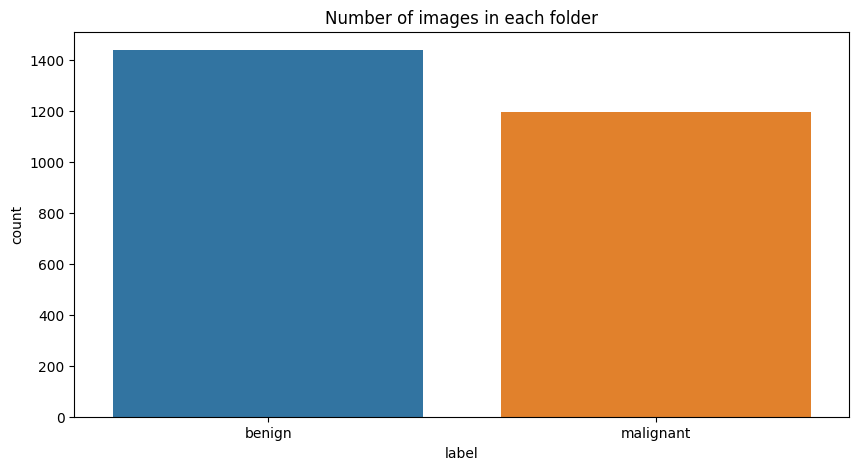

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)
plt.title('Number of images in each folder')
plt.show()


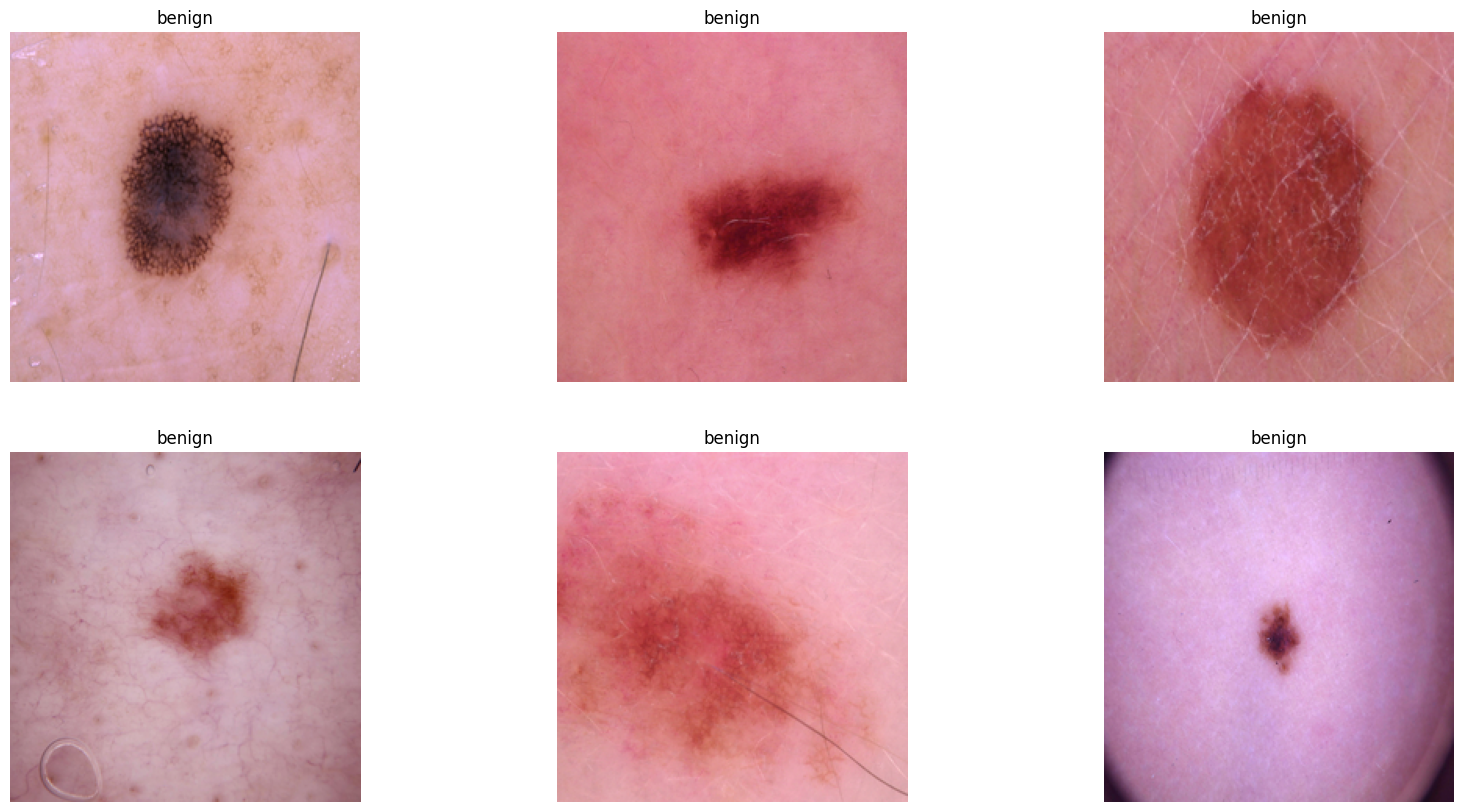

In [8]:
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = plt.imread(os.path.join(image, df.iloc[i, 1], df.iloc[i, 0]))
    plt.imshow(img)
    plt.title(df.iloc[i, 1])
    plt.axis('off')


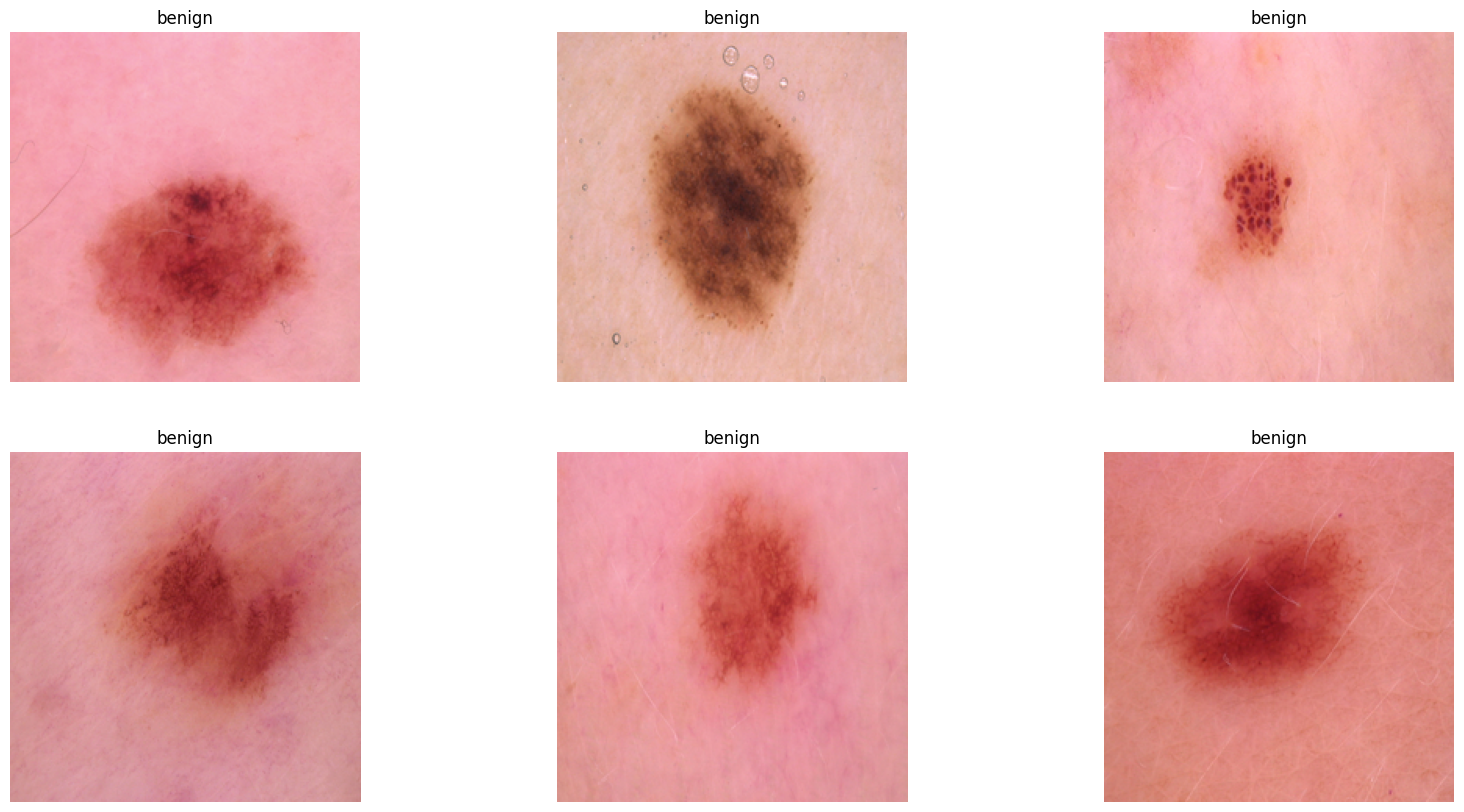

In [7]:
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = plt.imread(os.path.join(image, df.iloc[i+6, 1], df.iloc[i+6, 0]))
    plt.imshow(img)
    plt.title(df.iloc[i+6, 1])
    plt.axis('off')


In [8]:
# Data preprocessing from cell_images folder
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


In [9]:
# VGG19 model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3),
          activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [10]:
# Training the model using cell_images folder
train_generator = train_datagen.flow_from_directory(image,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')


Found 2637 images belonging to 2 classes.


In [11]:
# Training the model
history = model.fit_generator(train_generator,
                                epochs=10,
                                steps_per_epoch=100,
                                validation_steps=50)

C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_17580\3989013709.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
  9/100 [=>............................] - ETA: 1:02:15 - loss: 2.1711 - accuracy: 0.5625

In [ ]:
# Resize the images
from PIL import Image
import glob
import os


def resize_images():
    for filename in glob.glob('cell_images/Parasitized/*.png'):
        im = Image.open(filename)
        imResize = im.resize((224, 224), Image.ANTIALIAS)
        imResize.save(filename, 'PNG', quality=90)

    for filename in glob.glob('cell_images/Uninfected/*.png'):
        im = Image.open(filename)
        imResize = im.resize((224, 224), Image.ANTIALIAS)
        imResize.save(filename, 'PNG', quality=90)


In [ ]:
# Testing the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('cell_images',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')


In [ ]:
# Predict the image
img = plt.imread(
    'cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
img = tf.keras.preprocessing.image.load_img(
    'cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png', target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0
print(img.shape)

# Predict the image
pred = model.predict(img)
print(pred)


In [ ]:
# predict the image if else
if pred > 0.5:
    print('Parasitized')
else:
    print('Uninfected')


In [ ]:
# Save the model
model.save('malaria.h5')


In [ ]:
# Accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()